In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Load the dataset
data = pd.read_csv(url)
y = data['medv'].copy()
X = data.drop('medv', axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


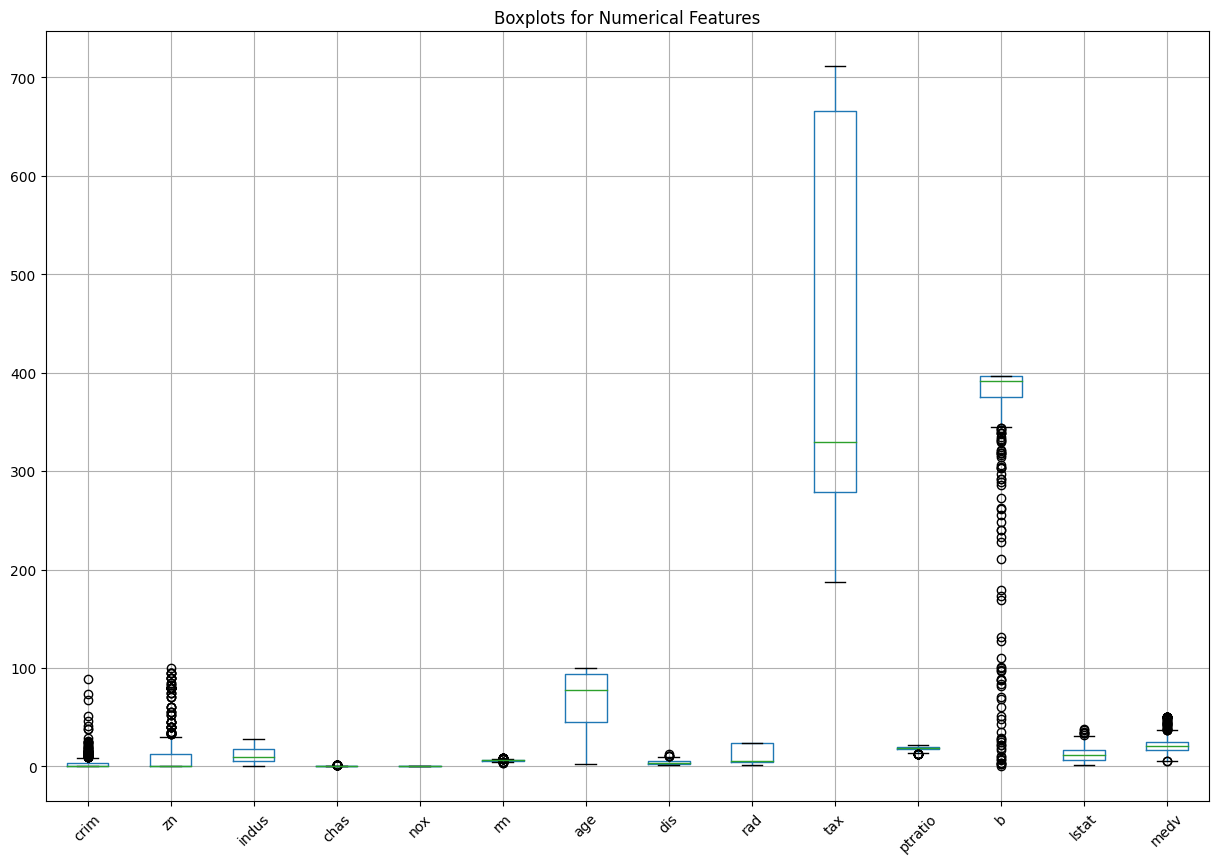

In [7]:
import matplotlib.pyplot as plt

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 10))
data.boxplot(column=data.columns.tolist())
plt.title('Boxplots for Numerical Features')
plt.xticks(rotation=45)
plt.show()


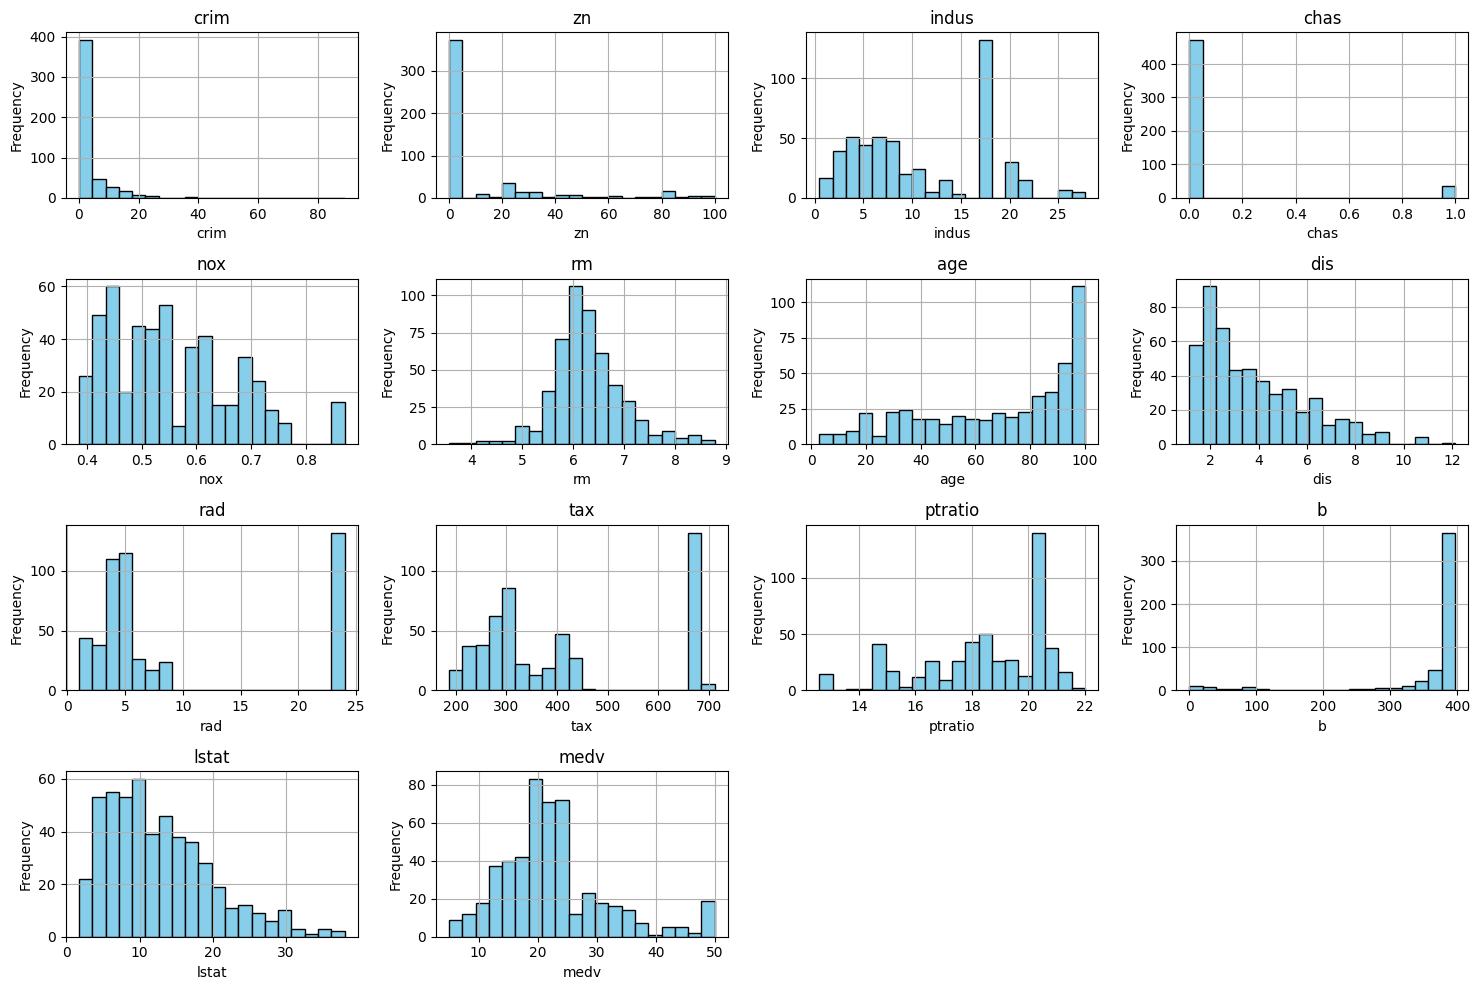

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    data[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


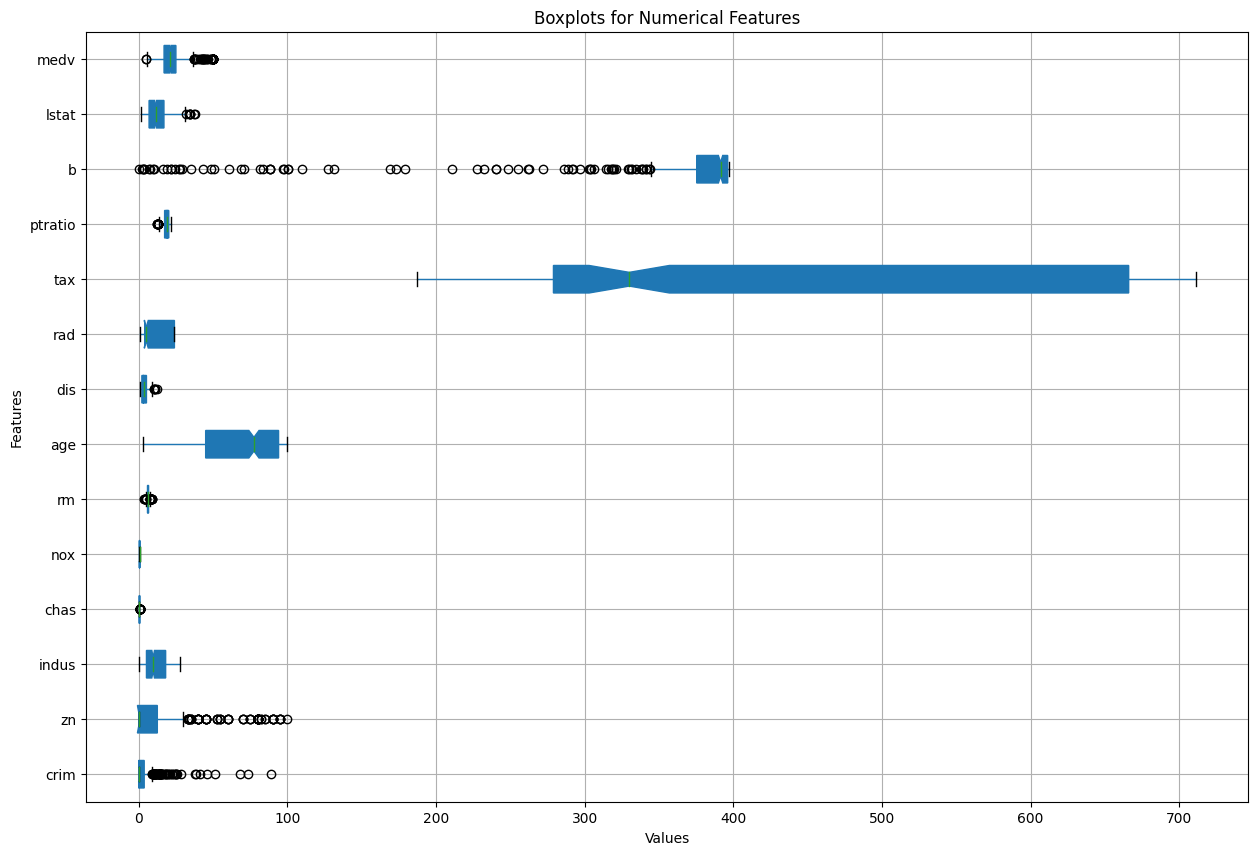

In [9]:
import matplotlib.pyplot as plt

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 10))
data.boxplot(column=data.columns.tolist(), notch=True, patch_artist=True, vert=False)
plt.title('Boxplots for Numerical Features')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()


In [10]:
def soft_thresholding(x, lambda_):
    return np.sign(x) * max(abs(x) - lambda_, 0)

def coordinate_descent_lasso(X, y, lambda_, num_iters=1000, tol=1e-4):
    m, n = X.shape
    w = np.zeros(n)
    b = 0

    for iteration in range(num_iters):
        w_old = w.copy()

        # Update each coordinate
        for j in range(n):
            Xj = X[:, j]
            residual = y - (X @ w + b)
            rho = Xj @ residual + w[j] * (Xj @ Xj)

            # Soft thresholding
            w[j] = soft_thresholding(rho, lambda_) / (Xj @ Xj)

        # Update intercept
        b = np.mean(y - X @ w)

        # Check for convergence
        if np.linalg.norm(w - w_old, ord=1) < tol:
            break

    return w, b

# Set lambda_ (regularization strength)
lambda_ = 0.1
w, b = coordinate_descent_lasso(X_train, y_train, lambda_)

from sklearn.metrics import mean_squared_error

# Prediction on test data
y_pred = X_test @ w + b
mse = mean_squared_error(y_test, y_pred)
print("MSE for lasso regression: ", mse)

MSE for lasso regression:  24.29203247490197


In [11]:
def coordinate_descent_least_squares_with_bias(X, y, num_iters=1000, tol=1e-4):
    m, n = X.shape
    w = np.zeros(n)
    b = 0  # Initialize the bias term

    for iteration in range(num_iters):
        w_old = w.copy()
        b_old = b

        # Update the bias term
        residual_b = y - (X @ w + b)
        b += np.sum(residual_b) / m

        for j in range(n):
            Xj = X[:, j]
            residual = y - (X @ w + b) + Xj * w[j]
            w[j] = Xj @ residual / (Xj @ Xj)

        # Check for convergence
        if np.linalg.norm(w - w_old) < tol and abs(b - b_old) < tol:
            break

    return w, b

# Example usage with the Boston Housing dataset
w_ls, b_ls = coordinate_descent_least_squares_with_bias(X_train, y_train)
y_pred_ls = X_test @ w_ls + b_ls
mse_ls = mean_squared_error(y_test, y_pred_ls)
print("MSE for Least Squares with Bias: ", mse_ls)

MSE for Least Squares with Bias:  24.29127725144234


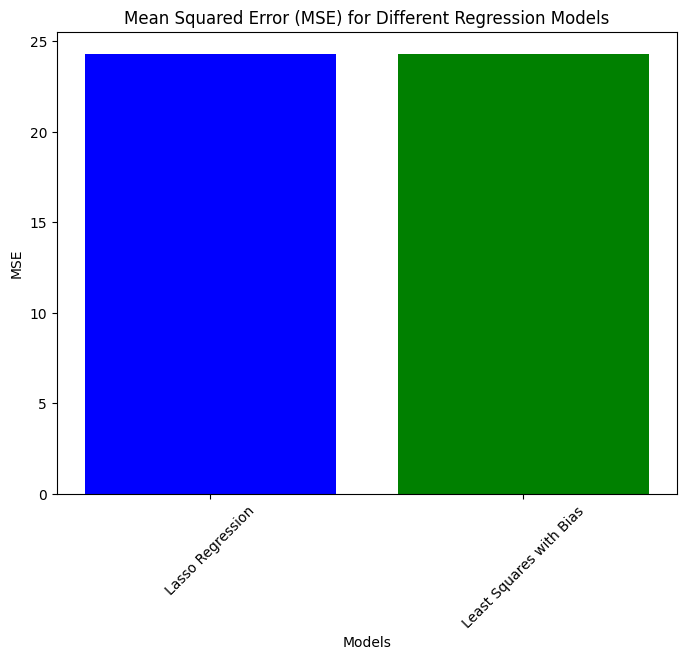

In [12]:
import matplotlib.pyplot as plt

# Dictionary to store MSE values
mse_values = {
    'Lasso Regression': mse,
    'Least Squares with Bias': mse_ls
}

# Create a bar plot for MSE values
plt.figure(figsize=(8, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'green'])
plt.title('Mean Squared Error (MSE) for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


In [13]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tol = tol
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Compute predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            d_weights = -(2/m) * np.dot(X.T, (y - y_pred))
            d_bias = -(2/m) * np.sum(y - y_pred)

            # Update parameters
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            # Check for convergence
            if np.linalg.norm(d_weights) < self.tol and np.abs(d_bias) < self.tol:
                break

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Instantiate and fit the model
gd_lr = GradientDescentLinearRegression()
gd_lr.fit(X_train, y_train)

# Predict
y_pred_gd_lr = gd_lr.predict(X_test)

# Compute MSE
mse_gd_lr = mean_squared_error(y_test, y_pred_gd_lr)
print("MSE for Gradient Descent Linear Regression:", mse_gd_lr)


MSE for Gradient Descent Linear Regression: 24.691181817294954


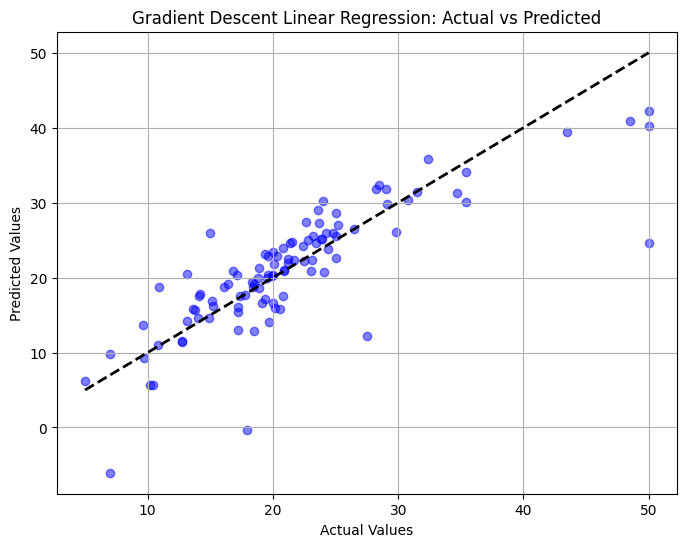

In [14]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gd_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Descent Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()


In [18]:
# Convert target to binary
median_val = y.median()
y_binary = (y > median_val).astype(int)

# Split the binary data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_train_bin = X_train_bin.values
y_train_bin = y_train_bin.values
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def coordinate_descent_logistic_with_bias(X, y, num_iters=1000, tol=1e-4, lambda_=0.01):
    m, n = X.shape
    w = np.zeros(n)
    b = 0  # Initialize bias term

    for iteration in range(num_iters):
        w_old = w.copy()
        b_old = b

        # Update bias
        predictions = sigmoid(X @ w + b)
        residual = y - predictions
        b_gradient = -np.sum(residual) / m  # Gradient for bias
        b -= lambda_ * b_gradient

        for j in range(n):
            Xj = X[:, j]
            predictions = sigmoid(X @ w + b)  # Update predictions including bias
            residual = y - predictions
            gradient = -(Xj @ residual) / m
            w[j] -= lambda_ * gradient

        if np.linalg.norm(w - w_old) < tol and abs(b - b_old) < tol:
            break

    return w, b  # Make sure to return both weights and bias

# X_train_bin = X_train_bin.values
# y_train_bin = y_train_bin.values

w_log, b_log = coordinate_descent_logistic_with_bias(X_train_bin, y_train_bin)
y_pred_prob_log = sigmoid(X_test_bin @ w_log + b_log)
accuracy = np.mean(y_pred_prob_log == y_test_bin)
mse_log = mean_squared_error(y_test_bin, y_pred_prob_log)

print("Accuracy for Logistic Regression: ", accuracy)
print("MSE for Logistic Regression: ", mse_log)

<ipython-input-18-7b40fb7fc10c>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy for Logistic Regression:  0.4411764705882353
MSE for Logistic Regression:  0.3235294117647059


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
def model_accuracy(y_true, y_pred, task_type='regression', tolerance=0.1):
    """
    Calculates the accuracy for predictions. For regression, predictions are considered
    correct if they are within a specified tolerance percentage of the actual values.
    For classification, it calculates the percentage of exact matches.

    Args:
    y_true (np.array): Actual values.
    y_pred (np.array): Predicted values.
    task_type (str): Type of task 'regression' or 'classification'.
    tolerance (float): The percentage of the actual value that predictions
                       can differ by and still be considered correct (for regression).

    Returns:
    float: The accuracy of the predictions.
    """
    if task_type == 'classification':
        # Assume y_pred for classification is already in the form of 0s and 1s
        return np.mean(y_pred == y_true)
    elif task_type == 'regression':
        return np.mean(np.abs((y_pred - y_true) / y_true) <= tolerance)
    else:
        raise ValueError("Unsupported task type provided. Use 'classification' or 'regression'.")

# Usage for Lasso and Least Squares Regression
tolerance = 0.1  # 10% tolerance
acc_lasso = model_accuracy(y_test, y_pred, task_type='regression', tolerance=tolerance)
acc_least_squares = model_accuracy(y_test, y_pred_ls, task_type='regression', tolerance=tolerance)

# Usage for Logistic Regression (assuming y_pred_prob_log is converted to binary predictions)
y_pred_log = (y_pred_prob_log > 0.5).astype(int)  # Convert probabilities to binary predictions
acc_logistic = model_accuracy(y_test_bin, y_pred_log, task_type='classification')

print("Accuracy for Lasso Regression within 10% tolerance: ", acc_lasso)
print("Accuracy for Least Squares Regression within 10% tolerance: ", acc_least_squares)
print("Accuracy for Logistic Regression: ", acc_logistic)

Accuracy for Lasso Regression within 10% tolerance:  0.46078431372549017
Accuracy for Least Squares Regression within 10% tolerance:  0.46078431372549017
Accuracy for Logistic Regression:  0.6764705882352942


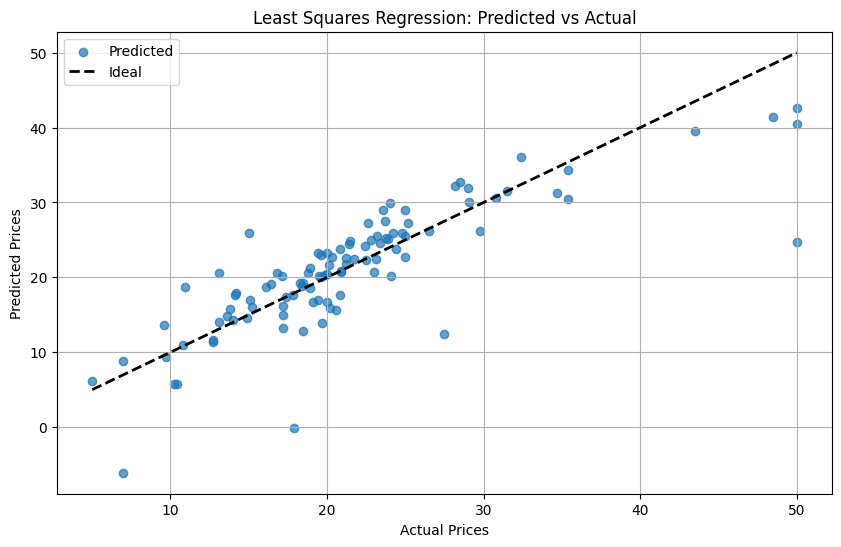

In [21]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ls, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Least Squares Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()
